# Extract $r=D^-/D^+$ from SIDIS cross-section ratio of $(e,e'\pi^+)/(e,e'\pi^+)$ 

last edit July-14, 2022

## Imports and definitions

In [2]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
from event_selection_tools        import *;


In [4]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

## (1) Load cross-section ratio results

In [20]:
z_bins   = np.arange(0.3,0.8,0.1)
z_widths = 0.01*np.ones(len(z_bins))
xlabel   = "Bjorken $x$"
x_bins   = np.linspace(0.2,0.6,11)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2

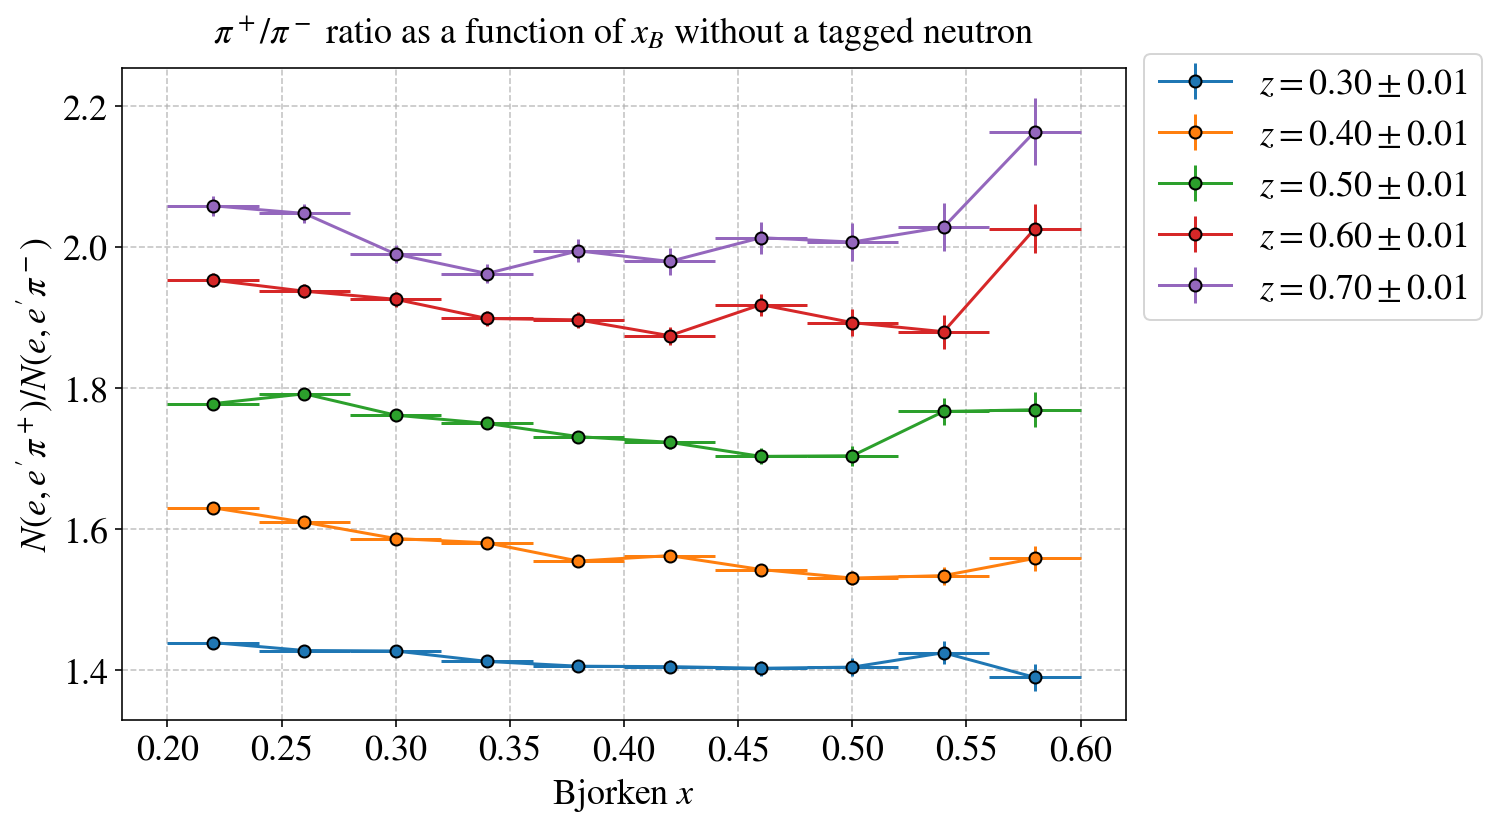

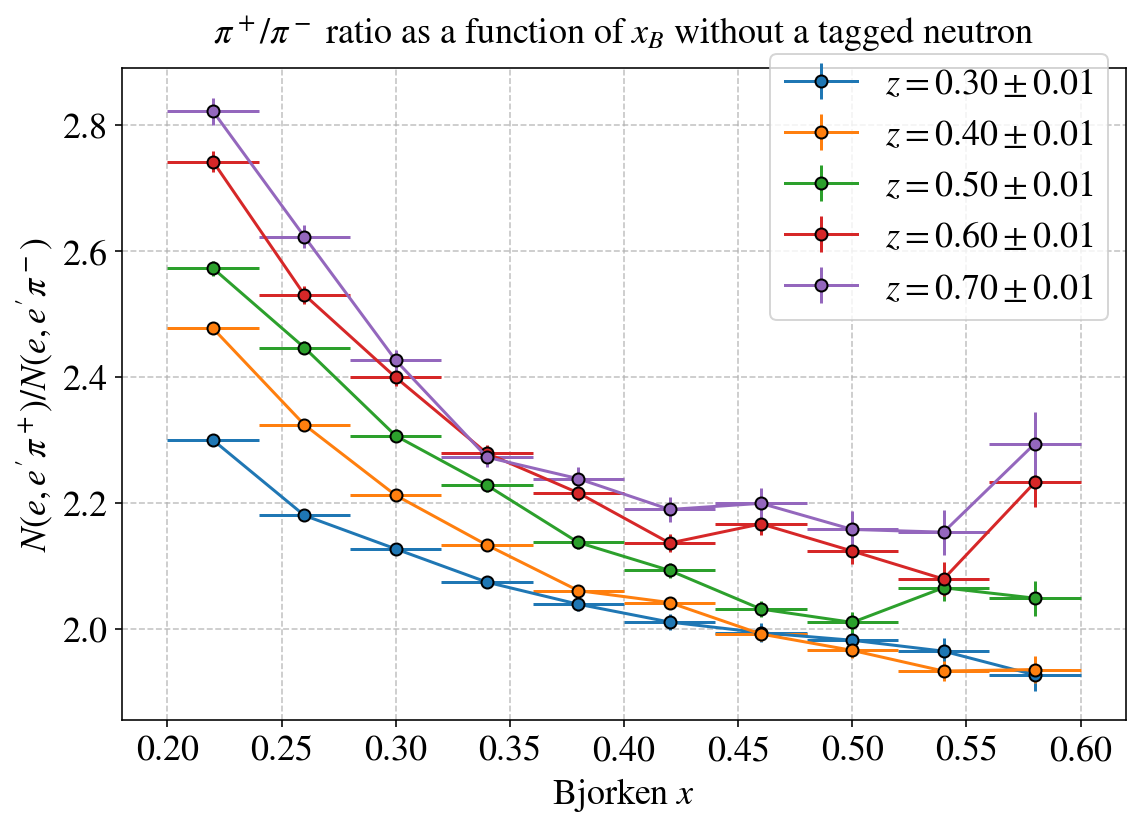

In [13]:
Xsec_results = dict()
prefix = 'Untagged_SIDIS_ratio_'
suffix = ''
Xsec_results[prefix+suffix] = load_SIDIS_ratio_DataFrame(z_bins=z_bins,z_widths=z_widths,
                                                         xlabel=xlabel,
                                                         x_bins=x_bins,
                                                         prefix = prefix, suffix = suffix, 
                                                         doPlotResults=True)

prefix = 'Untagged_SIDIS_ratio_'
suffix = '_No_AcceptanceMatchingCut'
Xsec_results[prefix+suffix] = load_SIDIS_ratio_DataFrame(z_bins=z_bins,z_widths=z_widths,
                                                         xlabel=xlabel,
                                                         x_bins=x_bins,
                                                         prefix = prefix, suffix = suffix,
                                                         doPlotResults=True)

## (2) Plot selected cross-section ratio results on the same axis frame

In [14]:
prefix = 'Untagged_SIDIS_ratio_'

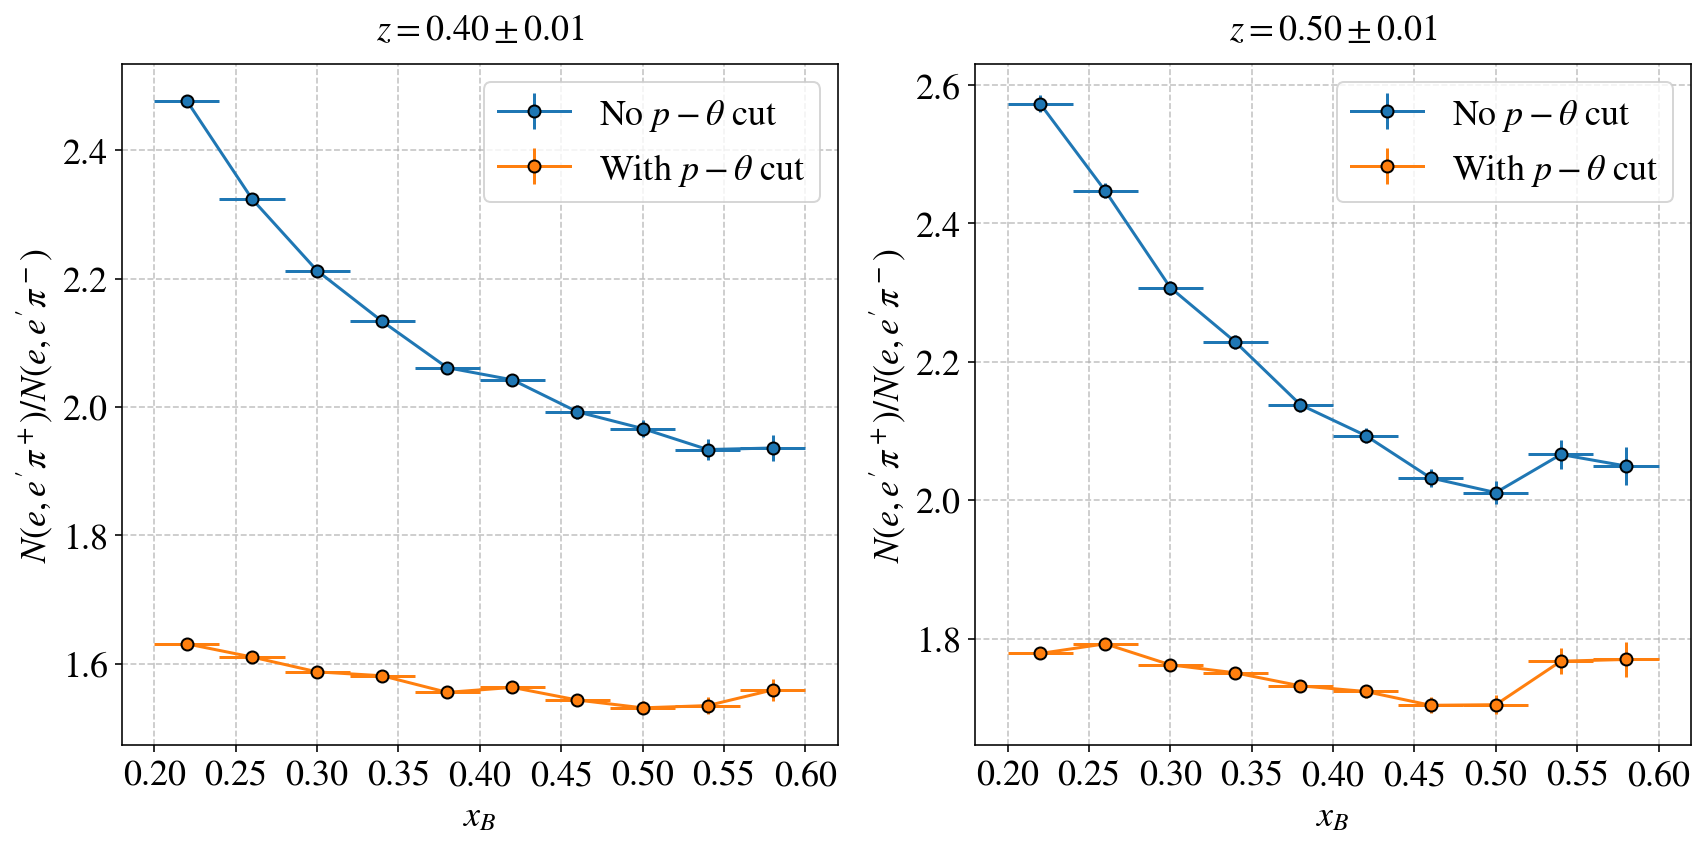

In [33]:
fig = plt.figure(figsize=(12,6))
for z_idx in [1,2]:

    ax  = fig.add_subplot(1,2,z_idx)
    z_bin       = z_bins[z_idx]
    z_width     = z_widths[z_idx]
    z_min,z_max = z_bin-z_width,z_bin+z_width
    filelabel = 'z_%.2f-%.2f'%(z_bin-z_width,z_bin+z_width)

    for suffix,suuffix_label in zip(['_No_AcceptanceMatchingCut',''],
                                    ['No $p-\\theta$ cut','With $p-\\theta$ cut']):
        filename  =  prefix + filelabel + suffix
        df   = Xsec_results[prefix + suffix][filename]
        R    = df['$R$']
        R_err= (df['$\Delta R_{+}$'],df['$\Delta R_{-}$'])
        # plot
        l=ax.errorbar(x=x, xerr=x_err,  y=R, yerr=R_err,
                    marker='o',markeredgecolor='k',
                    label=suuffix_label)

    
    set_axes(ax,'$x_B$',"$N(e,e'\pi^+)/N(e,e'\pi^-)$",
             title='$z=%.2f\pm%.2f$'%(z_bin,z_width),
             do_add_grid=True, do_add_legend=True, fontsize=18,
            );
# plt.legend(bbox_to_anchor=(1,1.05),loc='best',fontsize=18)

plt.tight_layout()

# (3) Convert ratio to $r=D^-/D^+$

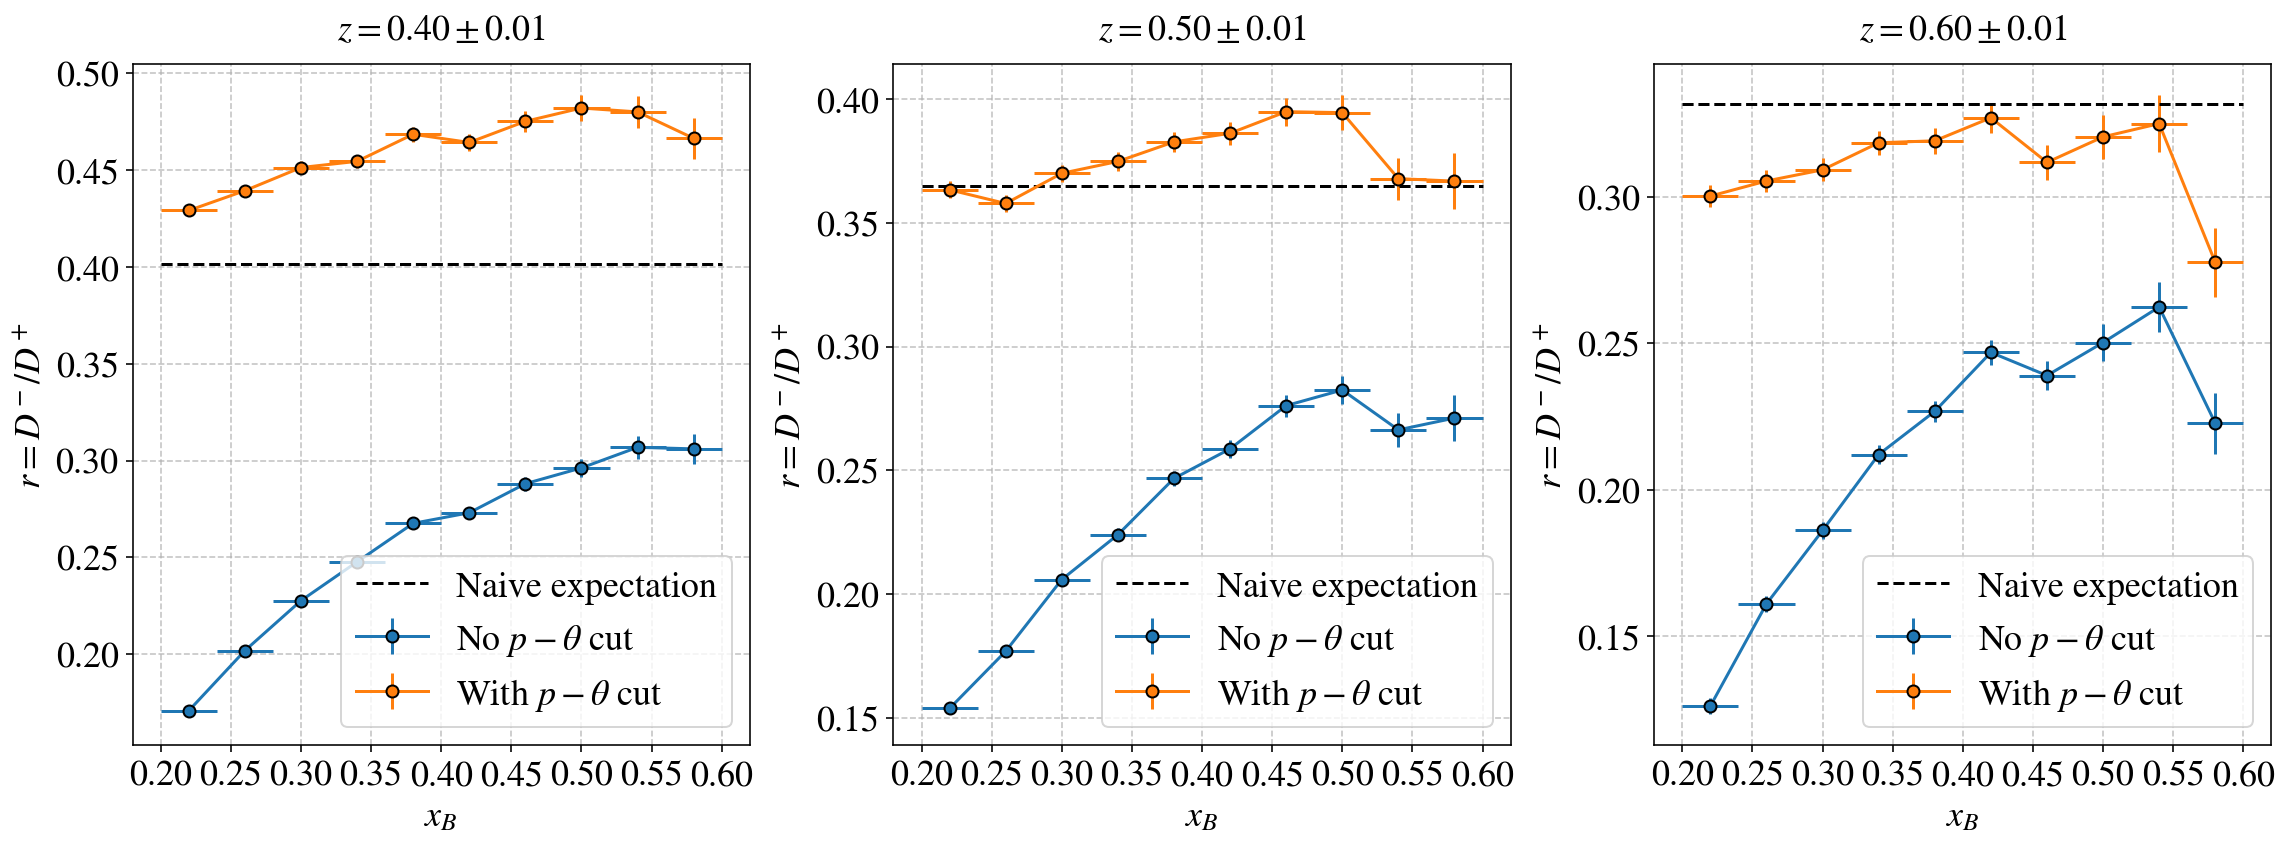

In [40]:
fig = plt.figure(figsize=(16,6))
for z_idx in [1,2,3]:

    ax  = fig.add_subplot(1,3,z_idx)
    z_bin       = z_bins[z_idx]
    z_width     = z_widths[z_idx]
    z_min,z_max = z_bin-z_width,z_bin+z_width
    filelabel = 'z_%.2f-%.2f'%(z_bin-z_width,z_bin+z_width)

    z = z_bin
    r_naive = 0.16*z*z - 0.51*z + 0.58
    
    for suffix,suuffix_label in zip(['_No_AcceptanceMatchingCut',''],
                                    ['No $p-\\theta$ cut','With $p-\\theta$ cut']):
        filename  =  prefix + filelabel + suffix
        df   = Xsec_results[prefix + suffix][filename]
        R    = df['$R$']
        R_err= (df['$\Delta R_{+}$'],df['$\Delta R_{-}$'])
        r    = (4. - R)/(4*R - 1)
        r_err= (17*df['$\Delta R_{+}$']/np.square(4*df['$R$']-1),17*df['$\Delta R_{-}$']/np.square(4*df['$R$']-1))
        
        # plot
        l=ax.errorbar(x=x, xerr=x_err,  
                      y=r, yerr=r_err,
                    marker='o',markeredgecolor='k',
                    label=suuffix_label)

    # plot naive expectation
    plt.plot( [0.2,0.6], r_naive*np.ones(2), '--k' ,label='Naive expectation')
    
    set_axes(ax,'$x_B$',"$r = D^-/D^+$",
             title='$z=%.2f\pm%.2f$'%(z_bin,z_width),
             do_add_grid=True, do_add_legend=True, fontsize=18,
            );
# plt.legend(bbox_to_anchor=(1,1.05),loc='best',fontsize=18)

plt.tight_layout()